# Exploratory Data Analysis 

En esta sección realizamos un análisis exploratorio de los datos con el fin de de tener como base para la limpieza y la construcción del modelo, el objetivo principal es comprender la estructura del dataset, identificar valores faltantes y atípicos, analizar distribuciones de variables relevantes y detectar posibles relaciones entre variables



## Importación de librerias y cargo de datos

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path



In [7]:
df = pd.read_csv(r"C:\Users\Jhoan meza\Music\Prubea Procter and gamble\data\Food_Delivery_Times.csv")


## Analisis pre-liminar

In [15]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [12]:
df.shape

(1000, 9)

In [13]:
df.info

<bound method DataFrame.info of      Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0         522         7.93   Windy           Low   Afternoon      Scooter   
1         738        16.42   Clear        Medium     Evening         Bike   
2         741         9.52   Foggy           Low       Night      Scooter   
3         661         7.44   Rainy        Medium   Afternoon      Scooter   
4         412        19.03   Clear           Low     Morning         Bike   
..        ...          ...     ...           ...         ...          ...   
995       107         8.50   Clear          High     Evening          Car   
996       271        16.28   Rainy           Low     Morning      Scooter   
997       861        15.62   Snowy          High     Evening      Scooter   
998       436        14.17   Clear           Low   Afternoon         Bike   
999       103         6.63   Foggy           Low       Night      Scooter   

     Preparation_Time_min  Courier_Experien

In [14]:
df.describe

<bound method NDFrame.describe of      Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0         522         7.93   Windy           Low   Afternoon      Scooter   
1         738        16.42   Clear        Medium     Evening         Bike   
2         741         9.52   Foggy           Low       Night      Scooter   
3         661         7.44   Rainy        Medium   Afternoon      Scooter   
4         412        19.03   Clear           Low     Morning         Bike   
..        ...          ...     ...           ...         ...          ...   
995       107         8.50   Clear          High     Evening          Car   
996       271        16.28   Rainy           Low     Morning      Scooter   
997       861        15.62   Snowy          High     Evening      Scooter   
998       436        14.17   Clear           Low   Afternoon         Bike   
999       103         6.63   Foggy           Low       Night      Scooter   

     Preparation_Time_min  Courier_Experi

El dataset cuenta con 1000 registros y 9 variables, que incluyen información numérica y categórica
relacionada con las condiciones de entrega, el repartidor y el tiempo total de entrega.


## Analisis del target

In [23]:
# Analisis del target

print(f"Media: {df['Delivery_Time_min'].mean():.2f} minutos")
print(f"Mediana: {df['Delivery_Time_min'].median():.2f} minutos")
print(f"Desviación estándar: {df['Delivery_Time_min'].std():.2f} minutos")
print(f"Mínimo: {df['Delivery_Time_min'].min():.2f} minutos")
print(f"Máximo: {df['Delivery_Time_min'].max():.2f} minutos")

Media: 56.73 minutos
Mediana: 55.50 minutos
Desviación estándar: 22.07 minutos
Mínimo: 8.00 minutos
Máximo: 153.00 minutos


Media: 56.73 minutos
Mediana: 55.50 minutos
Desviación estándar: 22.07 minutos
Mínimo: 8.00 minutos
Máximo: 153.00 minutos


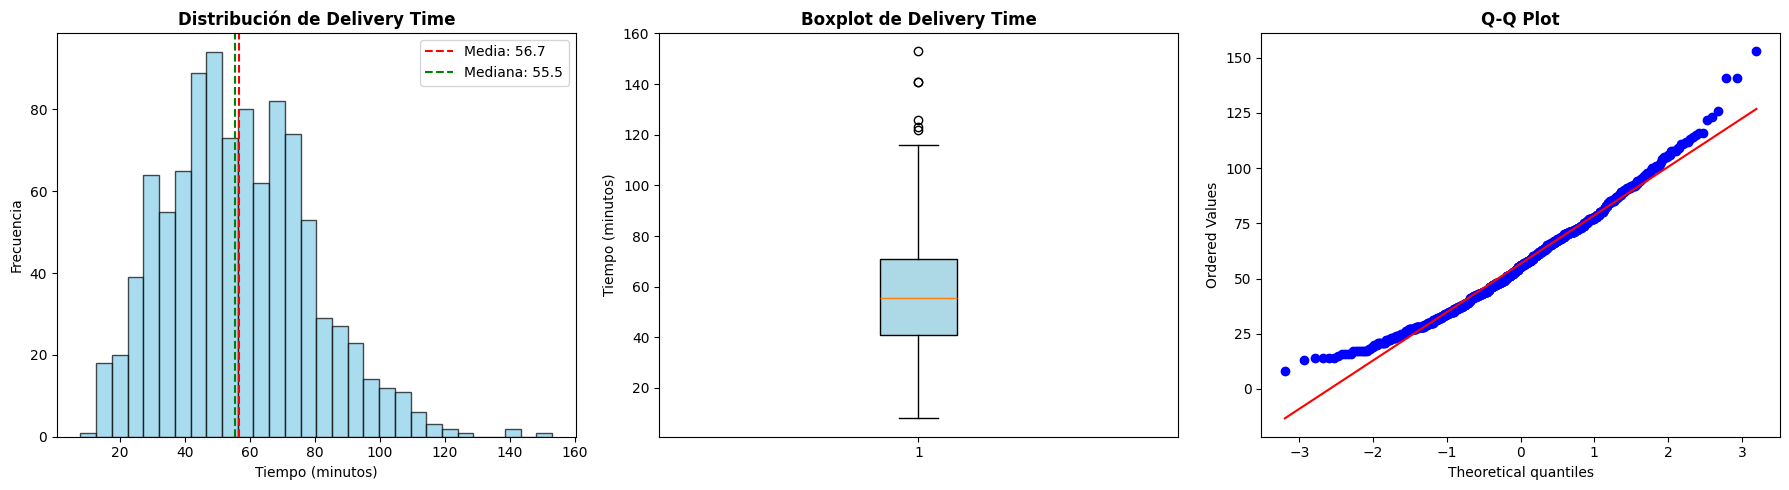

In [32]:
# Análisis del target
target = 'Delivery_Time_min'

print(f"Media: {df[target].mean():.2f} minutos")
print(f"Mediana: {df[target].median():.2f} minutos")
print(f"Desviación estándar: {df[target].std():.2f} minutos")
print(f"Mínimo: {df[target].min():.2f} minutos")
print(f"Máximo: {df[target].max():.2f} minutos")

# Distribución del target
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma
axes[0].hist(df[target], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Delivery Time', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tiempo (minutos)')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(df[target].mean(), color='red', linestyle='--', label=f'Media: {df[target].mean():.1f}')
axes[0].axvline(df[target].median(), color='green', linestyle='--', label=f'Mediana: {df[target].median():.1f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(df[target], vert=True, patch_artist=True, 
                boxprops=dict(facecolor='lightblue'))
axes[1].set_title('Boxplot de Delivery Time', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Tiempo (minutos)')

# Q-Q plot
from scipy import stats
stats.probplot(df[target], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

El tiempo de entrega presenta una media cercana a la mediana, lo que indica una distribución relativamente equilibrada. Sin embargo, se observan valores atípicos y una ligera desviación de la normalidad, los cuales deberán considerarse en etapas posteriores del análisis.

## Variables categoricas

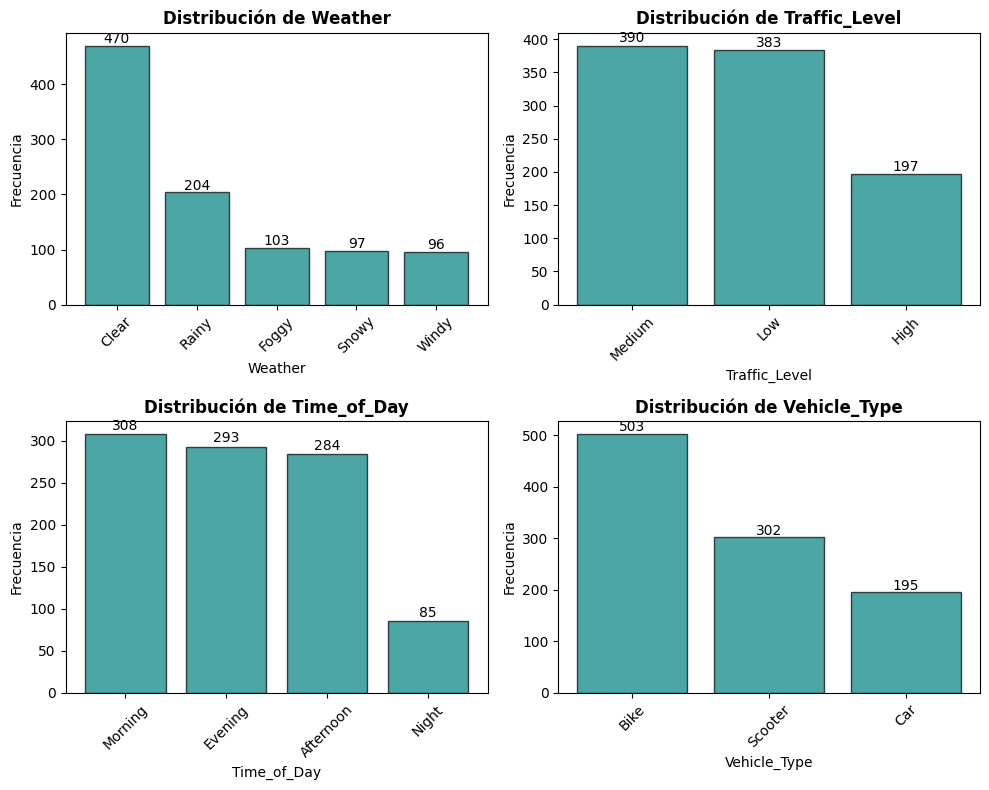


Weather:
Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

Traffic_Level:
Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64

Time_of_Day:
Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64

Vehicle_Type:
Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64


In [37]:
# Variables categóricas
cat_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for idx, col in enumerate(cat_cols):
    # Contar valores
    value_counts = df[col].value_counts()
    
    # Gráfico de barras
    axes[idx].bar(value_counts.index, value_counts.values, color='teal', alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Agregar valores en las barras
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + 5, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Resumen
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

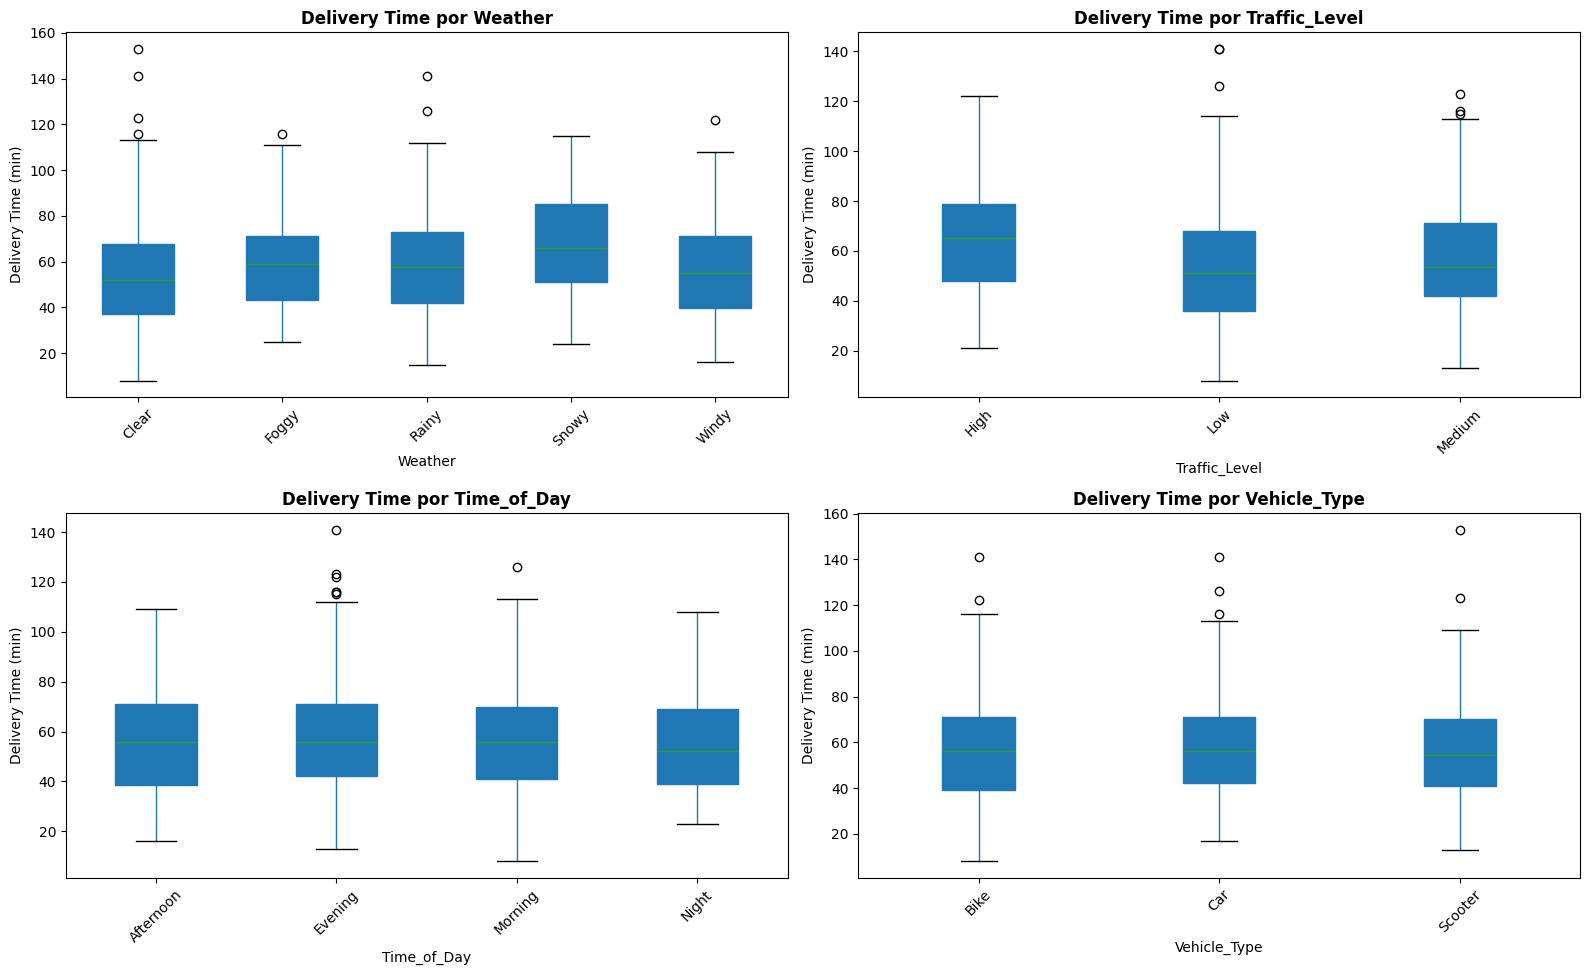


Weather:
          mean  median    std
Weather                      
Clear    53.08    52.0  21.27
Foggy    59.47    59.0  20.86
Rainy    59.79    57.5  22.82
Snowy    67.11    66.0  21.29
Windy    55.46    55.0  21.78

Traffic_Level:
                mean  median    std
Traffic_Level                      
High           64.81    65.0  21.87
Low            52.89    51.0  21.68
Medium         56.02    53.5  21.19

Time_of_Day:
              mean  median    std
Time_of_Day                      
Afternoon    56.08    56.0  21.09
Evening      57.48    56.0  22.18
Morning      56.12    56.0  21.54
Night        55.21    52.0  21.43

Vehicle_Type:
               mean  median    std
Vehicle_Type                      
Bike          56.57    56.0  22.19
Car           58.20    56.0  22.52
Scooter       56.05    54.5  21.60


In [36]:
# Relación categóricas vs target
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(cat_cols):
    # Eliminar NaN temporalmente para visualización
    df_temp = df[[col, target]].dropna()
    
    # Boxplot
    df_temp.boxplot(column=target, by=col, ax=axes[idx], 
                     patch_artist=True, grid=False)
    axes[idx].set_title(f'Delivery Time por {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Delivery Time (min)')
    plt.sca(axes[idx])
    plt.xticks(rotation=45)

plt.suptitle('')  # Remover título automático
plt.tight_layout()
plt.show()

# Estadísticas por categoría
for col in cat_cols:
    print(f"\n{col}:")
    print(df.groupby(col)[target].agg(['mean', 'median', 'std']).round(2))

Las variables categóricas muestran diferencias moderadas en el tiempo de entrega. Se observan tiempos ligeramente mayores bajo condiciones climáticas adversas y niveles altos de tráfico, mientras que el momento del día y el tipo de vehículo presentan variaciones más acotadas.


## Variabes numericas

       Distance_km  Preparation_Time_min  Courier_Experience_yrs
count      1000.00               1000.00                  970.00
mean         10.06                 16.98                    4.58
std           5.70                  7.20                    2.91
min           0.59                  5.00                    0.00
25%           5.11                 11.00                    2.00
50%          10.19                 17.00                    5.00
75%          15.02                 23.00                    7.00
max          19.99                 29.00                    9.00


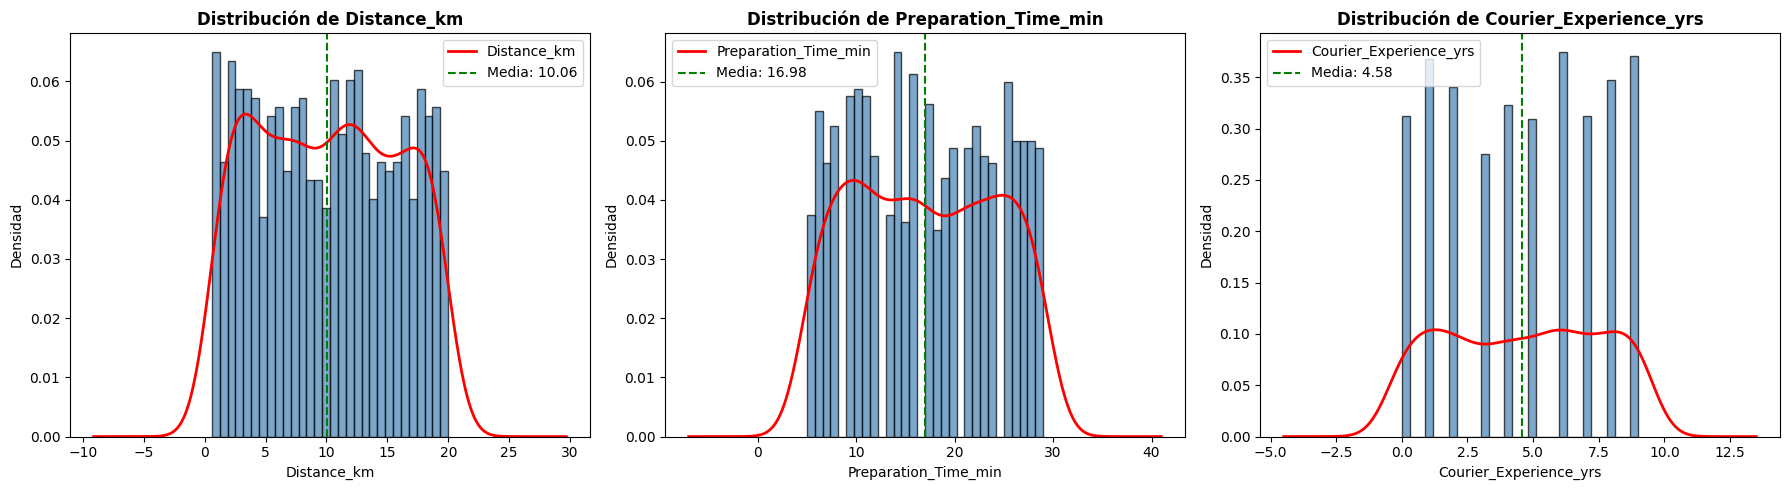

In [40]:
# Variables numéricas
num_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

print(df[num_cols].describe().round(2))

# Distribuciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(num_cols):
    # Histograma con KDE
    axes[idx].hist(df[col].dropna(), bins=30, color='steelblue', 
                   alpha=0.7, edgecolor='black', density=True)
    
    # KDE
    df[col].dropna().plot(kind='kde', ax=axes[idx], color='red', linewidth=2)
    
    axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Densidad')
    axes[idx].axvline(df[col].mean(), color='green', linestyle='--', 
                      label=f'Media: {df[col].mean():.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

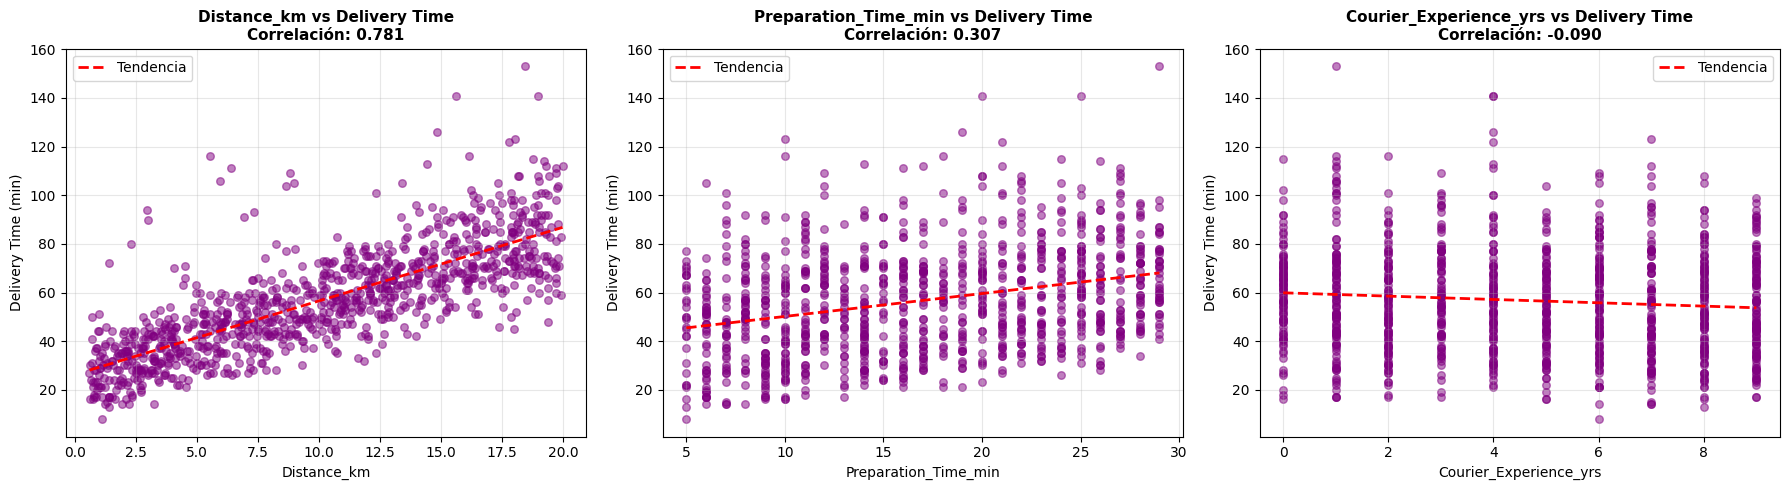

Delivery_Time_min         1.000000
Distance_km               0.780998
Preparation_Time_min      0.307350
Courier_Experience_yrs   -0.090433
Name: Delivery_Time_min, dtype: float64


In [42]:
# Scatter plots vs target
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(num_cols):
    # Scatter plot
    axes[idx].scatter(df[col], df[target], alpha=0.5, color='purple', s=30)
    
    # Línea de tendencia
    z = np.polyfit(df[col].dropna(), df[df[col].notna()][target], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[col].dropna().sort_values(), 
                   p(df[col].dropna().sort_values()), 
                   "r--", linewidth=2, label='Tendencia')
    
    # Calcular correlación
    corr = df[[col, target]].corr().iloc[0, 1]
    
    axes[idx].set_title(f'{col} vs Delivery Time\nCorrelación: {corr:.3f}', 
                        fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Delivery Time (min)')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlaciones exactas
correlations = df[num_cols + [target]].corr()[target].sort_values(ascending=False)
print(correlations)

Las variables numéricas presentan comportamientos diferenciados frente al tiempo de entrega. La distancia muestra una relación positiva fuerte con el tiempo de entrega, mientras que el tiempo de preparación tiene una correlación moderada. La experiencia del repartidor presenta
una relación débil y ligeramente negativa, lo que sugiere un impacto limitado en la variabilidad del tiempo de entrega.


## Valores faltantes

In [47]:
# Valores faltantes
missing = df.isnull().sum()
print(missing)

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


## Matriz de correlación

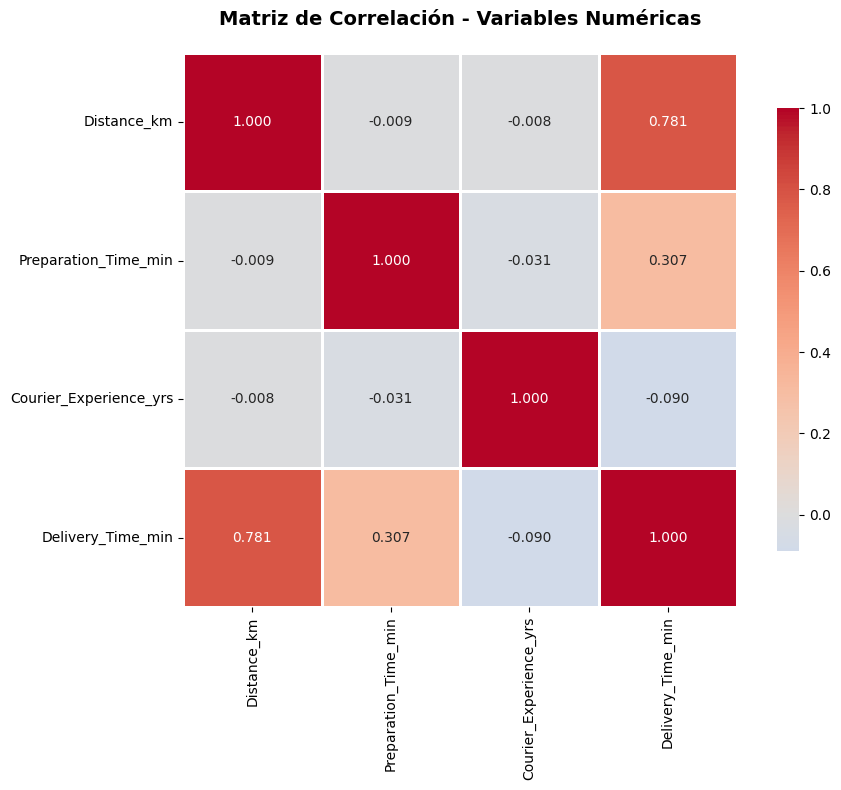

In [49]:
# Matriz de correlación (solo numéricas)
numeric_df = df[num_cols + [target]].copy()

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})

plt.title('Matriz de Correlación - Variables Numéricas', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

